### 랜덤 포레스트
- 결정트리의 과적합 문제를 완화
- 트리를 '랜덤하게' 여러가지로 만들고 이들의 평균을 취하는 방법
- 랜덤한 속성을 주는 방법으로, 샘플을 랜덤하게 취하거나, 특징을 랜덤하게 취한다
- 평균을 구할 전체 트리의 숫자를 정해줘야 한다 (n_estimators)
- 데이터를 랜덤하게 취하기 위해서 부트스트랩 샘플링을 한다(같은 수의 샘플을 취하되 중복 샘플링을 허용하는 방법). 샘플수가 100개면 한번도 샘플링 되지 않는 샘플수가 약 36%정도 된다.
- 몇 개의 특성을 사용할지도 지정한다(max_features)
- 특성을 선택하는 작업은 각 노드에서 반복되므로 노드마다 다른 특성을 사용하게 된다.(랜덤한 성격)
- 회귀분석을 할 때는 앙상블의 평균치를 구한다
- 분류의 경우는 확률을 고려한 약한 투표를 한다. (대표값 하나만 투표하지 않고 여러 가능성의 가중평균을 구한다)
- 남자와 여자를 구분하는법 : 100개의 트리를 만듬. 85 vs 25

### 예제
- 아래는 5개의 트리를 만드는 예 (실제는 수백개의 트리를 만든다)
- 트리 속성은 estimator_에 저장된다.
- 5개 트리 각각의 결정경계를 그렸다.(서로 모양이 많이 다르다)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- 아래는 유방암 데이터의 예로 100개의 트리를 만든다
- 성능이 많이 개선되었다
- 특성중요도를 그림으로 나타냈다 (단일 트리의 경우보다 많은 특성이 사용되고 있는 것을 알 수 있다)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


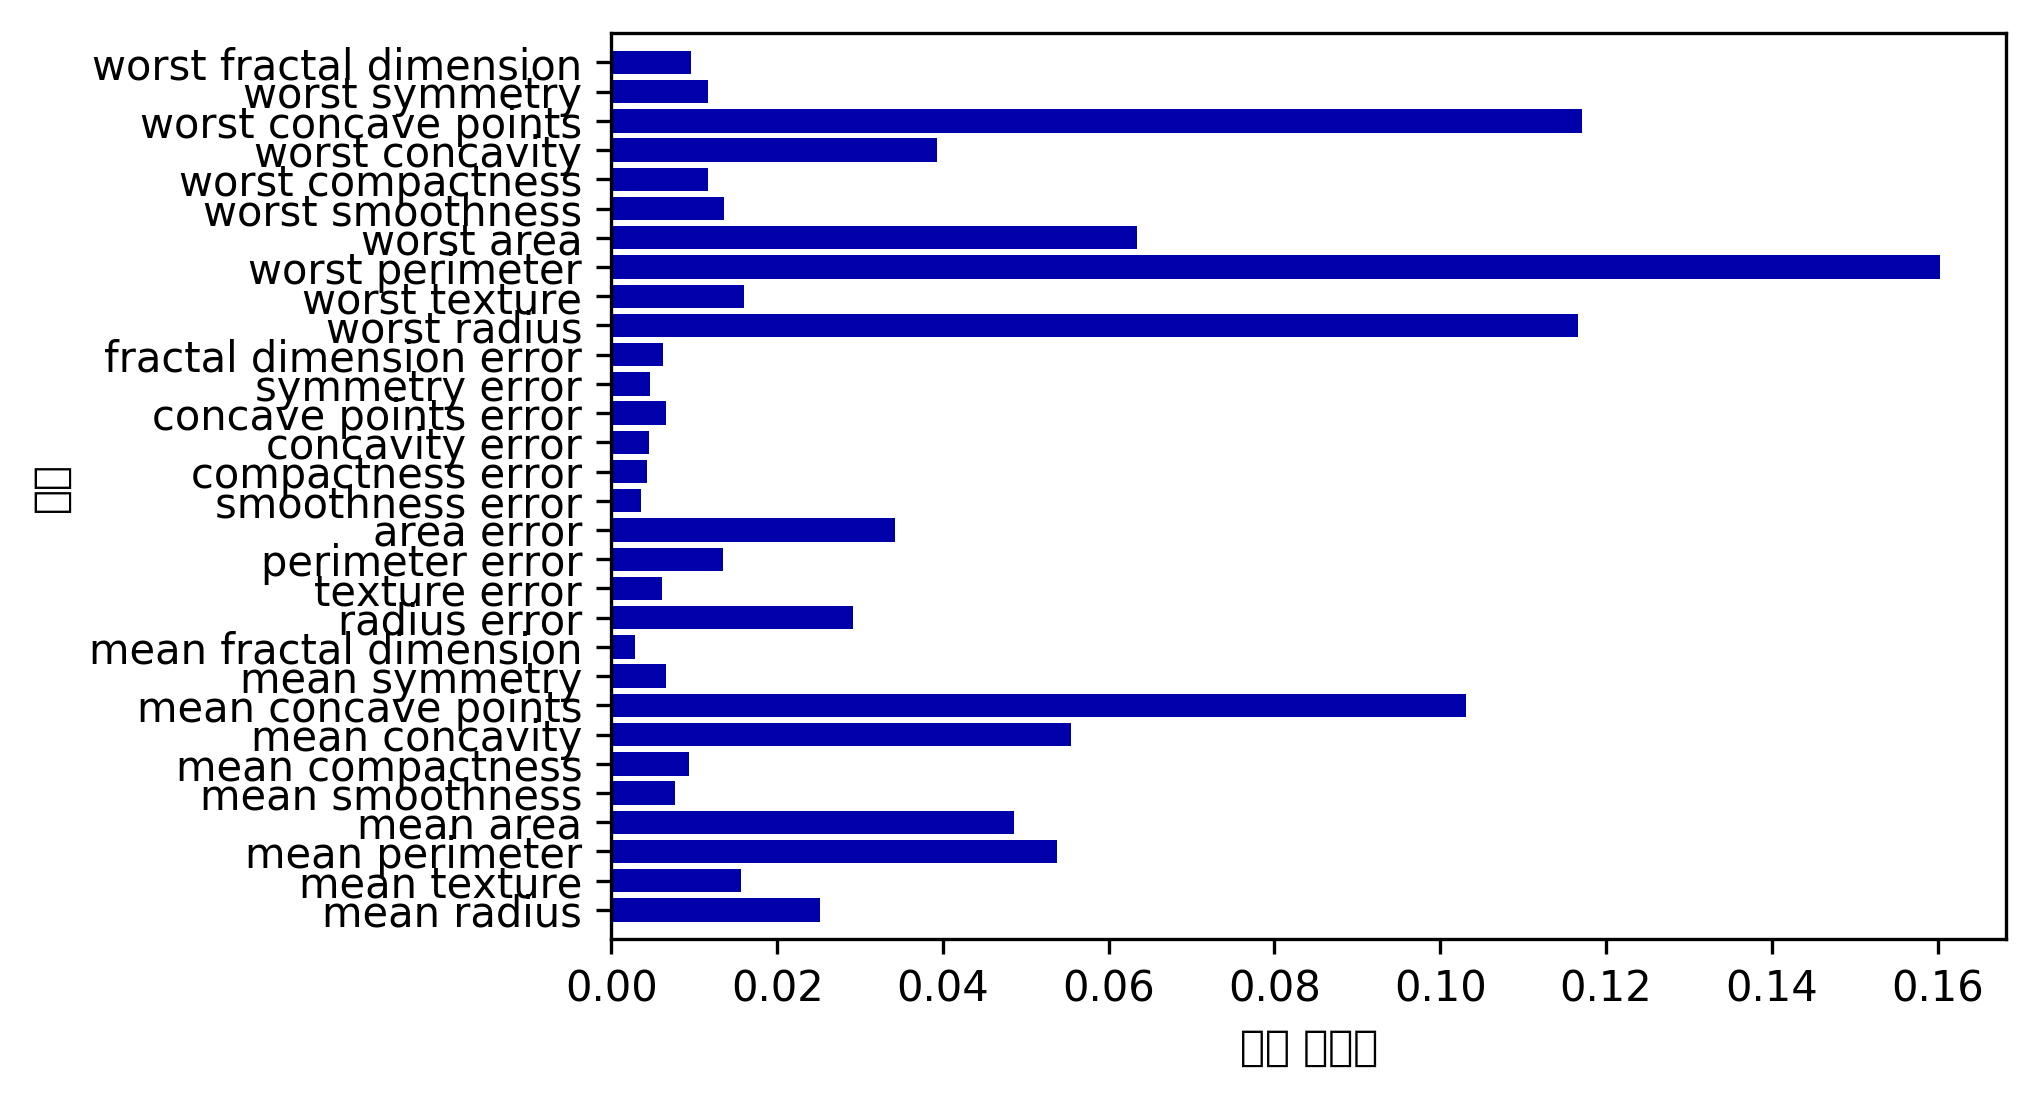

In [32]:
plot_feature_importances_cancer(forest)

### 장단점
- 스케일링을 하지 않아도 잘 동작한다.
- 여러개의 CPU에서 나누어 수행하기가 쉽다 (n_jobs=-1)
- n_estimator는 클수록 성능이 좋아진다
- 대량의 데이터에도 잘 동작한다 (훈련 시간은 오래 걸린다)
- 랜덤하므로 결과 모데리 매번 달라질 수 있다
- 텍스트 데이터처럼 차원이 높고 희소한 데이터에는 잘 동작하지 않는다 (선형모델이 더 적합)
- 기본값은 분류에서는 max_features = SQRT(n_features)이고, 회귀에서는 max_features = n_features이다. 
- max_leaf_nodes를 조절하기도 한다

### 그래디언트 부스팅 회귀 트리
- 랜덤한 방식으로 트리의 앙상블을 구하는 것이 아니라 이전의 트리의 성능을 단계적으로 보완하는 방식으로 동작. 오차를 줄이는 방향으로 트리를 추가하는 방식으로 경사하강법을 사용한다.
- 깊지 않은 트리를 사용함으로써 학습속도가 빠르다
- 학습속도(learning rate)를 미세하게 조정해주어야 한다.
- (무작위성 대신에) 사전 가지치기를 사용한다
- 가장 성능이 좋은 알고리즘으로 분류 및 예측에 모두 사용된다
#### 아래는 유방암 예측을 하는 예
- 기본값은, 트리 깊이는 3, 트리 수는 100개, 학습속도 0.01

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [34]:
gbrt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [56]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.05,max_depth=2)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.958


- 아래는 깊이가 '1'인 트리를 사용하는예로, 깊이가 1이어도 잘 동작한다

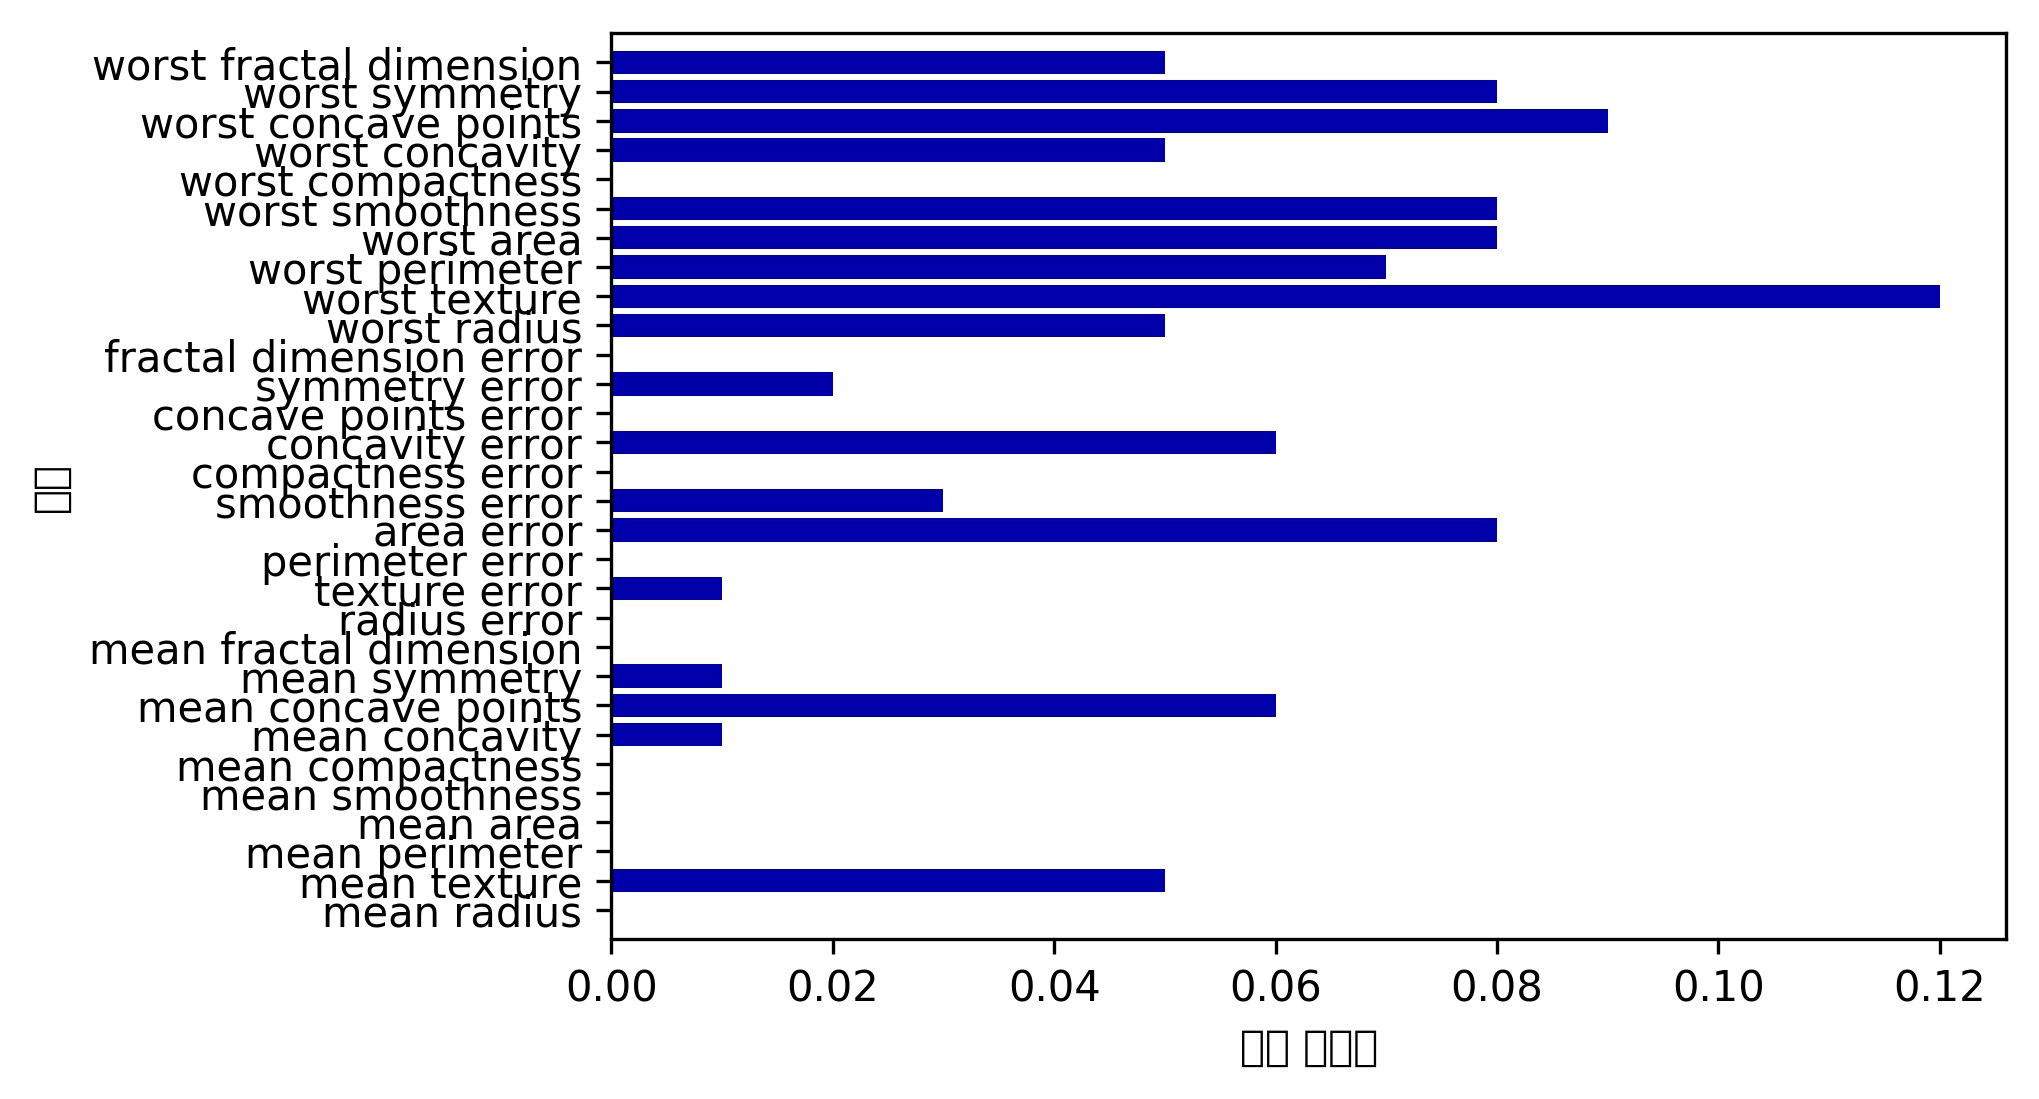

In [38]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### 장단점
- 기본적으로는 랜덤포레스트를 사용하고, 성능 향상이 중요한 경우에는 정교하게 gb 방식을 도입한다. 성능은 비슷하다
- 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다
- 학습속도를 낮추면 보통 더 많은 트리를 사용해야 한다.
- 랜덤 포레스트에서는 트리의 수가 많을수록 성능이 개선되었느나, gb에서는 과적합될 수 있다
- 먼저 가용한 자원 범위에서 트리의 수를 정하고, 학습속도를 튜닝한다.
- 트리의 깊이는 보통 5 이하를 사용한다